# Algoritmos de optimización - Reto 2

Nombre: Julio Emanuel Suriano Bryk

Link en Github: https://github.com/EmaSuriano/python-demos/blob/main/submits/Algoritmos_R2.ipynb

Link en Google Colab: https://colab.research.google.com/github/EmaSuriano/python-demos/blob/main/submits/Algoritmos_R2.ipynb


In [ ]:
# common libs
import pandas as pd
import numpy as np
import math
import random

# libraries for drawing
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# libraries type hint
from typing import Callable, Tuple

# make plots with visible on export
import plotly.io as pio

pio.renderers.default = "notebook_connected"

## Programación Dinámica. Viaje por el rio

- **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
- **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (\*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>

En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

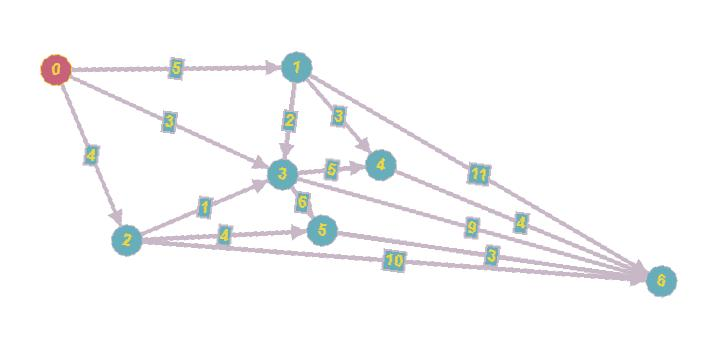


- Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.


In [ ]:
# helper functions
def get_nodes(routes: list[list]) -> list:
    """Given the routes configuration, return the list of unique nodes"""
    all_nodes = [num for sublist in routes for num in sublist[:2]]
    return list(set(all_nodes))


def generate_random_routes(n: int, range_weight: tuple[int, int]) -> list[list]:
    """Generate a random configuration of routes for n nodes

    Args:
        n (int): amount of nodes in the graph
        range_weight (tuple[int, int]): range of values for the random weight between the nodes

    Returns:
        list[list]: routes configuration
    """
    res = []
    all_nodes = list(range(n))

    for from_node in range(n):
        n_connections = random.randint(0, n - 1)
        to_nodes = random.sample(list(set(all_nodes) - {from_node}), n_connections)

        for to_node in to_nodes:
            connection = [from_node, to_node, random.randint(*range_weight)]
            res.append(connection)

    return res


def dijkstra(routes: list[list], start_node: int) -> list:
    """dijkstra implementation where given a graph configuration with weight, it return an array of cost given a start node

    Args:
        routes (list): graph configuration
        start_node (int): start node

    Returns:
        list: array with costs
    """
    nodes_amount = len(get_nodes(routes))

    # cost array to store
    costs = [math.inf] * nodes_amount
    visited = [False] * nodes_amount
    connections = [-1] * nodes_amount
    queue = []

    visited[start_node] = True
    costs[start_node] = 0

    queue.append((start_node, 0))

    while len(queue) > 0:
        queue.sort(key=lambda item: item[1], reverse=True)

        curr_node, curr_cost = queue.pop()
        visited[curr_node] = True

        curr_paths = [path for path in routes if path[0] == curr_node]
        for prev_node, next_node, next_cost in curr_paths:
            if visited[next_node]:
                continue

            new_cost = next_cost + curr_cost

            if new_cost < costs[next_node]:
                costs[next_node] = new_cost
                connections[next_node] = prev_node

                queue.append((next_node, new_cost))

    return (costs, connections)


def find_shortest_path(
    routes: list[list], start_node: int, to_node: int
) -> tuple[float, list]:
    """get the shortest path given a route config for a start node and an end node

    Args:
        routes (list): _description_
        start_node (int): _description_
        to_node (int): _description_

    Returns:
        _type_: _description_
    """
    costs, connections = dijkstra(routes, start_node)
    route = []
    cost = costs[to_node]

    # was able to reach the node
    if cost < math.inf:
        route.append(to_node)
        while route[-1] != start_node:
            next_node = connections[route[-1]]
            route.append(next_node)

        route.reverse()

    return (costs[to_node], route)

In [ ]:
def draw_graph(graph: list, start_node: int, end_node: int, connections: list):
    """Takes the whole graph to draw and the selected connections by index

    Args:
        graph (list): graph configuration
        start_node (int): start node to select in the graph
        end_node (int): end node to select in the graph
        connections (list): list of connections selected
    """
    # Create a graph
    G = nx.DiGraph()

    # extract list of nodes based on the connections and merge from and to into a single set
    nodes = get_nodes(graph)

    # Add nodes to the graph
    for node in nodes:
        G.add_node(node)

    # Add connections to the graph
    for a, b, w in graph:
        G.add_edge(a, b, weight=w)

    # Calculate positions for nodes
    pos = nx.shell_layout(G)

    # draw nodes, labels, and edges
    nx.draw(G, pos, with_labels=True)

    # Draw edge labels with weights
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Add highlighted connections
    edgelist = [
        [connections[i], connections[i + 1]] for i in range(len(connections) - 1)
    ]
    nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color="r")

    offset = 0.1  # Adjust this value to change the offset
    x, y = pos[start_node]
    plt.text(x, y + offset, "Start")
    x, y = pos[end_node]
    plt.text(x, y + offset, "End")

    plt.show()

In [ ]:
# Example of algorithm using the configuration from above
ROUTES = [
    [0, 1, 5],
    [0, 3, 3],
    [0, 2, 4],
    [1, 3, 2],
    [1, 4, 3],
    [1, 6, 11],
    [2, 3, 1],
    [2, 5, 4],
    [2, 6, 10],
    [3, 4, 5],
    [3, 5, 6],
    [3, 6, 9],
    [4, 6, 4],
    [5, 6, 3],
]
start_node, to_node = 0, 6

cost, path = find_shortest_path(ROUTES, start_node, to_node)

print("Start:", start_node, "End:", to_node)
print("Cost:", cost, "Path:", path)

draw_graph(ROUTES, start_node, to_node, path)

In [ ]:
# Picking random nodes for the same routes
start_node, to_node = random.sample(get_nodes(ROUTES), 2)

cost, path = find_shortest_path(ROUTES, start_node, to_node)

print("Start:", start_node, "End:", to_node)
print("Cost:", cost, "Path:", path)

draw_graph(ROUTES, start_node, to_node, path)

In [ ]:
# Generating random routes and selecting random nodes

n_nodes = 10
random_routes = generate_random_routes(n_nodes, (1, 10))

start_node, to_node = random.sample(range(n_nodes), 2)

cost, path = find_shortest_path(random_routes, start_node, to_node)

print("Start:", start_node, "End:", to_node)
print("Cost:", cost, "Path:", path)

draw_graph(random_routes, start_node, to_node, path)

## Descenso del gradiente


Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.


In [ ]:
Point2D = Tuple[float, float]
Point3D = Tuple[float, float, float]


def gradient_descent_with_derivate(
    f: Callable,
    df: Callable,
    initial_point: Point2D,
    learning_rate=0.01,
    num_iterations=1000,
    tolerance=1e-6,
) -> Tuple[Point2D, list[Point3D]]:
    """get minimum point of a function using method of gradient descent with derivate

    Args:
        f (Callable): function to get the minimum point
        df (Callable): derivate of the function
        initial_point (Point2D): start point to start looking for the minimum point
        learning_rate (float, optional): learning rate to move the point on each iteration. Defaults to 0.01.
        num_iterations (int, optional): numbers of iterations to run. Defaults to 1000.
        tolerance (float, optional): in case the point is . Defaults to 1e-6.

    Returns:
        Tuple[Point2D, list[Point3D]]: _description_
    """
    point = np.array(initial_point)
    history: list[Point3D] = [[*point, f(*point)]]

    for _ in range(num_iterations):
        # get gradient from the derivate function
        grad = np.array(df(*point))

        # get new point for the next iteration
        new_point = point - grad * learning_rate

        # save it in history
        history.append([*new_point, f(*new_point)])

        # Check for point convergence
        if np.linalg.norm(new_point - point) < tolerance:
            break

        # new_point becomes current point to continue the loop
        point = new_point

    return (list(point), history)

In [ ]:
def draw_function_with_gradient(
    f: Callable, graph_range: list, descent_history: list[Point3D]
):
    """Create plot using plotly to represent a gradient descent result of function

    Args:
        f (Callable): function to render
        graph_range (list): range to draw the function
        descent_history (list[Point3D]): history of the gradient descent algorithm
    """
    # Vectorize function in order to be possible to support numpy array operations
    f_vector = np.vectorize(f)

    # Create a grid of x and y values
    x, y = np.meshgrid(np.linspace(*graph_range, 100), np.linspace(*graph_range, 100))
    z = f_vector(x, y)

    # Create the plot
    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, opacity=0.7)])

    # convert history to pandas df
    descent_df = pd.DataFrame(descent_history, columns=["x", "y", "z"])

    points_df = pd.concat([descent_df.iloc[[0]], descent_df.iloc[[-1]]])
    start_text_plot = go.Scatter3d(
        x=points_df["x"],
        y=points_df["y"],
        z=points_df["z"],
        mode="markers+text",
        text=["Start", "End"],
    )

    line_plot = px.line_3d(
        descent_df, x="x", y="y", z="z", color_discrete_sequence=["white"]
    )

    # add plots to figure
    fig.add_traces(start_text_plot)
    fig.add_traces(line_plot.data)

    # set initial zoom for better visualization

    fig.update_layout(
        margin=dict(l=0, r=0, b=0),
        title=f"Min point found at {[round(x, 2) for x in descent_history[-1]]}",
    )

    # Show the plot
    fig.show()

In [ ]:
# Definimos la funcion Paraboloide
def f(x: float, y: float) -> float:
    return x**2 + y**2


# Derivada parciales de f
def df(x: float, y: float) -> Point2D:
    return (2 * x, 2 * y)  # Gradiente


point_range = [-5, 5]
initial_point: Point2D = (random.uniform(*point_range), random.uniform(*point_range))

end_point, descent_history = gradient_descent_with_derivate(
    f, df, initial_point=initial_point, learning_rate=0.3
)

print("Start point:", (*initial_point, f(*initial_point)))
print("End point:", (*end_point, f(*end_point)))
display(descent_history)

draw_function_with_gradient(f, point_range, descent_history)

## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x,y)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$


In [ ]:
# step size
grad_step_size = 1e-5


# Given that obtaining the derivate for f can be a challenging task, we can also accomplish the gradient descent by using the gradient method
def numerical_gradient(f: Callable, point: Point2D) -> Point2D:
    grad = np.zeros_like(point)

    for i in range(len(point)):
        point_with_step = point.copy()
        point_with_step[i] += grad_step_size
        grad[i] = (f(*point_with_step) - f(*point)) / grad_step_size

    return grad


def gradient_descent_with_gradient(
    f: Callable,
    initial_point: Point2D,
    learning_rate=0.01,
    num_iterations=1000,
    tolerance=1e-6,
):
    point = np.array(initial_point)
    history: list[Point3D] = [[*point, f(*point)]]

    for _ in range(num_iterations):
        grad = numerical_gradient(f, point)
        new_point = point - grad * learning_rate
        history.append([*new_point, f(*new_point)])

        # Check for convergence
        if np.linalg.norm(new_point - point) < tolerance:
            break

        point = new_point

    return point, history

In [ ]:
# function defintion
def f(x: float, y: float) -> float:
    return math.sin(1 / 2 * x**2 - 1 / 4 * y**2 + 3) * math.cos(2 * x + 1 - math.exp(y))


point_range = [-3, 3]
start_point = (random.uniform(*point_range), random.uniform(*point_range))

end_point, descent_history = gradient_descent_with_gradient(f, start_point)

print("Start point:", (*initial_point, f(*initial_point)))
print("End point:", (*end_point, f(*end_point)))

draw_function_with_gradient(f, point_range, descent_history)